In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.utils import to_categorical

In [3]:
train = pd.read_csv('C:/Users/jagad/Downloads/LP-IV-datasets/LP-IV-datasets/MNIST(Ass2&3)/mnist_train.csv')
test = pd.read_csv('C:/Users/jagad/Downloads/LP-IV-datasets/LP-IV-datasets/MNIST(Ass2&3)/mnist_test.csv')

In [45]:
x_train = train.drop('label',axis=1).values
x_test = test.drop('label', axis=1).values

# Reshape flattened data into 28x28x1
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


x_train=x_train/255.0
x_test=x_test/255.0

In [46]:
y_train = train['label'].values
y_test = test['label'].values

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [47]:
print('x_train shape',x_train.shape)
print('x_test shape',x_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

x_train shape (60000, 28, 28, 1)
x_test shape (10000, 28, 28, 1)
y_train shape (60000, 10)
y_test shape (10000, 10)


In [20]:
model = models.Sequential()

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))
          
          

In [21]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
history = model.fit(x_train, y_train, epochs=11, validation_data=(x_test,y_test))

Epoch 1/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4865 - loss: 1.5089 - val_accuracy: 0.9013 - val_loss: 0.3524
Epoch 2/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8399 - loss: 0.5377 - val_accuracy: 0.9259 - val_loss: 0.2567
Epoch 3/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8796 - loss: 0.4074 - val_accuracy: 0.9368 - val_loss: 0.2111
Epoch 4/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9010 - loss: 0.3399 - val_accuracy: 0.9458 - val_loss: 0.1794
Epoch 5/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9183 - loss: 0.2909 - val_accuracy: 0.9511 - val_loss: 0.1616
Epoch 6/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9250 - loss: 0.2632 - val_accuracy: 0.9550 - val_loss: 0.1494
Epoch 7/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9318 - loss: 0.2392 - val_accuracy: 0.9597 - val_loss: 0.1366
Epoch 8/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9378 - loss: 0.2207 - 

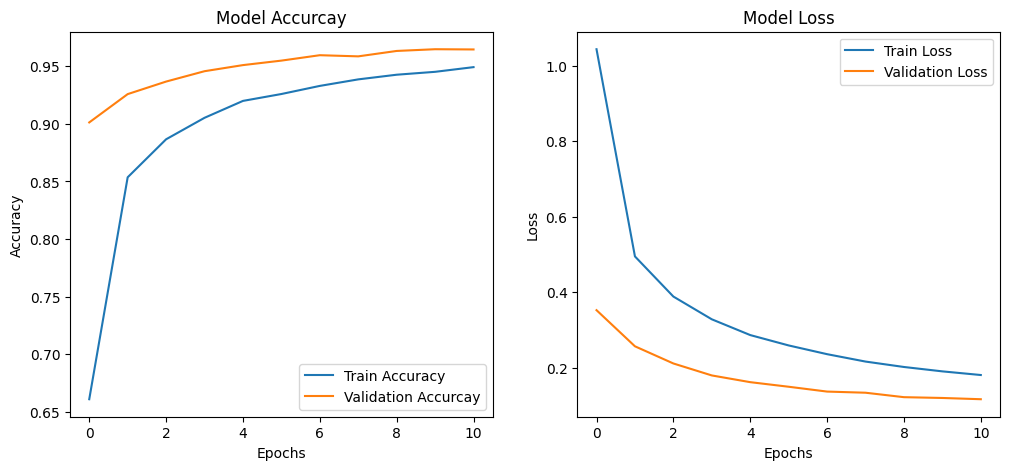

In [23]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accurcay')
plt.title('Model Accurcay')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [24]:
loss, accuracy = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9590 - loss: 0.1381


In [25]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Acctual:  9
Predicted:  9


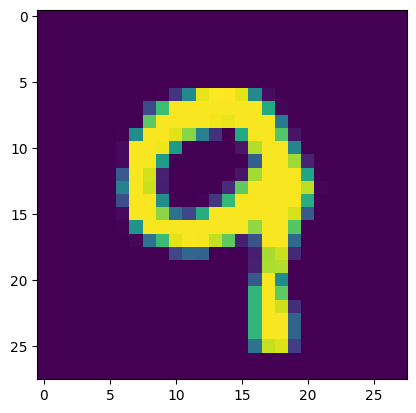

In [29]:
n=99
plt.imshow(x_test[n].reshape(28,28))
print('Acctual: ',np.argmax(y_test[n]))
print('Predicted: ',np.argmax(y_pred[n]))
plt.show()
           
           

In [51]:
#CNN

model2 = models.Sequential()

model2.add(layers.Conv2D(64,(3,3), activation='relu', input_shape=(28,28,1)))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(32,(3,3), activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))

model2.add(layers.Flatten())
model2.add(layers.Dense(100, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))
           

In [52]:
model2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
history2 = model2.fit(x_train, y_train, epochs=11)

Epoch 1/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.6350 - loss: 1.1851
Epoch 2/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9510 - loss: 0.1652
Epoch 3/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9642 - loss: 0.1159
Epoch 4/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9738 - loss: 0.0864
Epoch 5/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9772 - loss: 0.0738
Epoch 6/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9798 - loss: 0.0641
Epoch 7/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9831 - loss: 0.0550
Epoch 8/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9854 - loss: 0.0486
Epoch 9/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9865 - loss: 0.0449
Epoch 10/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9873 - loss: 0.0403
Epoch 11/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9873 - loss: 0.0394


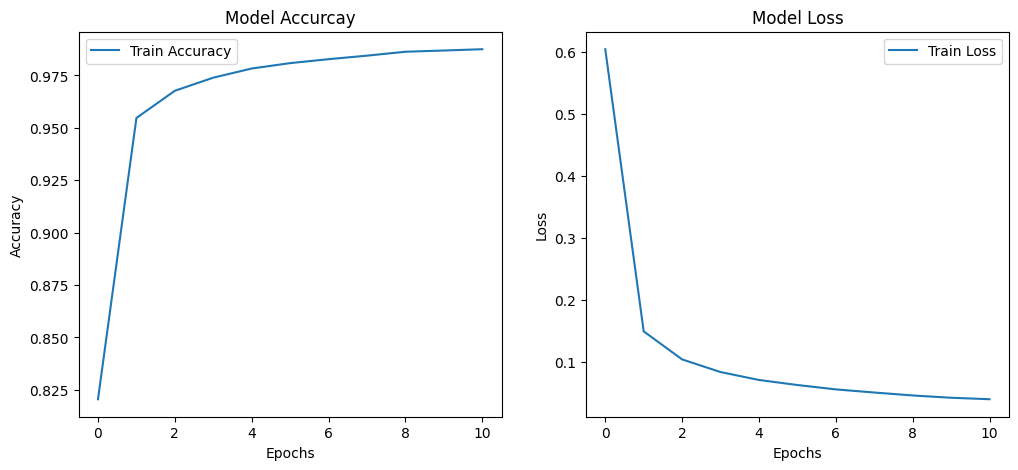

In [57]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history2.history['accuracy'], label='Train Accuracy')
# plt.plot(history2.history['val_accuracy'], label='Validation Accurcay')
plt.title('Model Accurcay')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history2.history['loss'], label='Train Loss')
# plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [58]:
loss, accuracy = model2.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9818 - loss: 0.0561


In [59]:
y_pred2 = model2.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


Acctual:  9
Predicted:  9


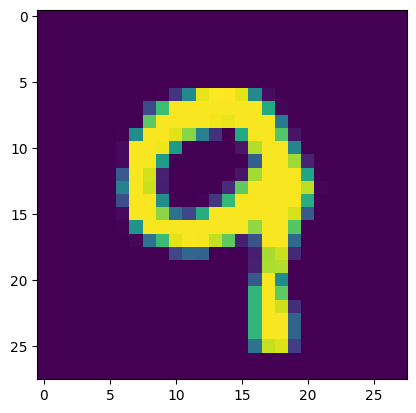

In [60]:
n=99
plt.imshow(x_test[n].reshape(28,28,1))
print('Acctual: ', np.argmax(y_test[n]))
print('Predicted: ', np.argmax(y_pred2[n]))
      